## 📘 Lesson 05: Logistic Regression in Supervised Learning

---

### 🎯 Learning Objectives:
- Understand what Logistic Regression is.
- Learn how it differs from Linear Regression.
- Explore the need for the sigmoid function.
- Study how the algorithm learns via cost function and gradient descent.
- Apply Logistic Regression using a real-world example.

---

## 🧠 What is Logistic Regression?

Despite the name, **Logistic Regression is a classification algorithm**, not a regression one.

It is used to predict the **probability** that a given input belongs to a **particular class**.

- **Output**: Probabilities (between 0 and 1), which can be mapped to class labels like 0 or 1.
- **Problem Type**: **Binary Classification** (can be extended to multi-class using softmax/multinomial logistic regression).

---

### 💡 Real-life Examples:
- Email Spam Detection → Spam (1) or Not Spam (0)
- Disease Diagnosis → Diseased (1) or Healthy (0)
- Customer Churn → Churn (1) or Not Churn (0)

---

## 📊 Regression vs Logistic Regression

| Aspect | Linear Regression | Logistic Regression |
|--------|-------------------|----------------------|
| Output | Continuous value | Probability (0 to 1) |
| Use Case | Predicting Salary, Price | Predicting Category/Class |
| Algorithm Goal | Minimize error | Maximize classification accuracy |
| Function | Linear equation | Sigmoid of linear equation |
| Cost Function | Mean Squared Error | Log Loss (Binary Cross-Entropy) |

---

## 📐 Why Linear Regression Fails for Classification?

If we use a linear equation for classification, the predicted values can go beyond 0 and 1, which **is not valid as probabilities**.

So, we apply a **sigmoid function** on the linear output to squash it between 0 and 1.

---

## 🧮 Sigmoid Function

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where \( z = m \cdot x + c \) (linear equation)

- If `z` is very high → output close to 1
- If `z` is very low → output close to 0

This way, we get a **probability score**.

Then we apply a **threshold** (usually 0.5) to classify:

- If \( \sigma(z) \geq 0.5 \) → class 1
- Else → class 0

---

## 🔍 Logistic Regression Equation

\[
P(y=1 | x) = \sigma(m \cdot x + c) = \frac{1}{1 + e^{-(m \cdot x + c)}}
\]

---

## 📉 Cost Function in Logistic Regression

Instead of Mean Squared Error, we use **Binary Cross Entropy (Log Loss)**:

\[
J(m, c) = -\frac{1}{n} \sum_{i=1}^{n} [ y^{(i)} \cdot \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - \hat{y}^{(i)}) ]
\]

Where:
- \( \hat{y}^{(i)} \) is the predicted probability
- `y` is the actual class (0 or 1)

This cost function penalizes wrong predictions heavily.

---

## 🔽 Learning via Gradient Descent

We update `m` and `c` using gradient descent like we did in linear regression, but derivatives are different due to the sigmoid function and log loss.

### Derivatives:
\[
\frac{\partial J}{\partial m} = \frac{1}{n} \sum ( \hat{y} - y ) \cdot x
\]
\[
\frac{\partial J}{\partial c} = \frac{1}{n} \sum ( \hat{y} - y )
\]

Update Rule:
\[
m = m - \alpha \cdot \frac{\partial J}{\partial m}, \quad c = c - \alpha \cdot \frac{\partial J}{\partial c}
\]

---

## ✍️ Example Problem – Logistic Regression from Scratch

Let’s say we have a dataset of hours studied and whether a student passed (1) or failed (0):

| Hours | Passed (1/0) |
|-------|--------------|
| 1 | 0 |
| 2 | 0 |
| 3 | 0 |
| 4 | 1 |
| 5 | 1 |

---

### 📎 Python Code Implementation (Basic - From Scratch)




Final m: 1.03 (True m = 1.5)
Final c: -4.67 (True c = -7.0)
Hours: 1.5, Predicted: 0
Hours: 2.5, Predicted: 0
Hours: 3.5, Predicted: 0
Hours: 4.5, Predicted: 0
Hours: 5.5, Predicted: 1
Hours: 6.5, Predicted: 1
Hours: 7.5, Predicted: 1
Hours: 8.5, Predicted: 1
Hours: 9.5, Predicted: 1


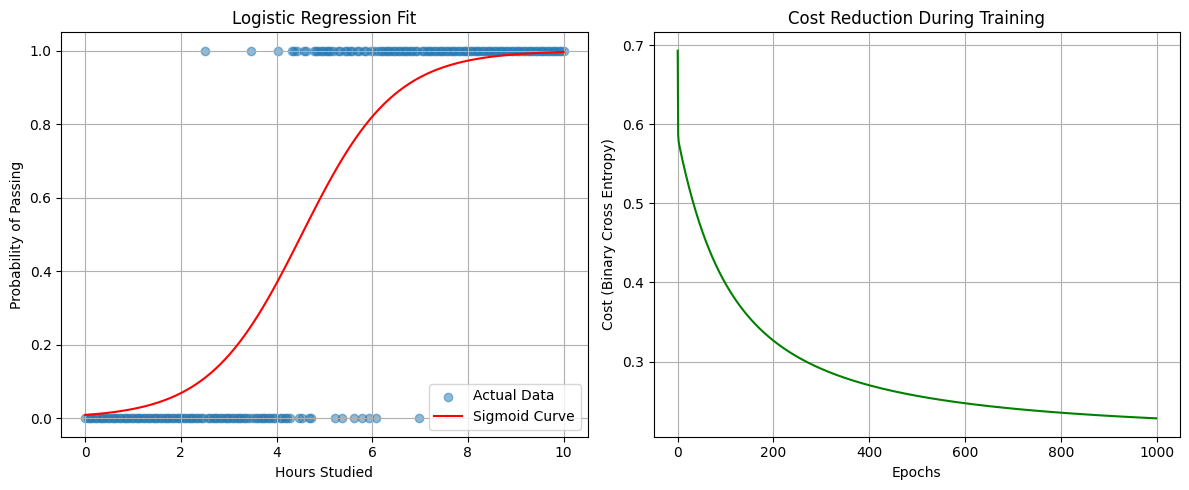

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate larger synthetic dataset with noise
np.random.seed(42)
X = np.linspace(0, 10, 200)  # 200 data points (e.g., hours studied)
true_m = 1.5  # True slope
true_c = -7.0  # True intercept
z = true_m * X + true_c
prob = 1 / (1 + np.exp(-z))  # True probability using sigmoid
Y = np.random.binomial(1, prob)  # Binary outcomes with noise

# Initialize parameters
m = 0.0  # Initial slope guess
c = 0.0  # Initial intercept guess
lr = 0.1  # Learning rate
epochs = 1000  # Training iterations
n = len(X)

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training Loop
costs = []
for i in range(epochs):
    z = m * X + c
    y_pred = sigmoid(z)
    
    # Cost (Binary Cross Entropy)
    cost = (-1/n) * np.sum(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))
    costs.append(cost)
    
    # Gradients
    dm = (1/n) * np.dot((y_pred - Y), X)
    dc = (1/n) * np.sum(y_pred - Y)
    
    # Update Parameters
    m -= lr * dm
    c -= lr * dc

print(f"Final m: {m:.2f} (True m = {true_m})")
print(f"Final c: {c:.2f} (True c = {true_c})")

# Predict Function
def predict(x):
    prob = sigmoid(m * x + c)
    return 1 if prob >= 0.5 else 0

# Testing
test = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
for t in test:
    print(f"Hours: {t}, Predicted: {predict(t)}")

# Plot results
plt.figure(figsize=(12, 5))

# Plot 1: Sigmoid Curve
plt.subplot(1, 2, 1)
plt.scatter(X, Y, alpha=0.5, label="Actual Data")
x_vals = np.linspace(0, 10, 100)
y_vals = sigmoid(m * x_vals + c)
plt.plot(x_vals, y_vals, color='red', label="Sigmoid Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Fit")
plt.legend()
plt.grid()

# Plot 2: Cost vs. Epochs
plt.subplot(1, 2, 2)
plt.plot(range(epochs), costs, color='green')
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross Entropy)")
plt.title("Cost Reduction During Training")
plt.grid()

plt.tight_layout()
plt.show()


## ✅ Summary

- Logistic Regression is used for **binary classification**.
- It uses the **sigmoid function** to map outputs between 0 and 1.
- Unlike Linear Regression, we use **Binary Cross Entropy** as the cost function.
- It learns using **gradient descent**, similar to Linear Regression but with a different loss and derivative.